In [1]:
import requests

In [2]:
r = requests.get("https://divar.ir/s/iran/car")

In [3]:
r

<Response [200]>

In [4]:
from pprint import pprint

b'<!doctype html>\n<html lang="fa-IR" dir="rtl" data-theme="light">\n<head>\n  <title data-react-helmet="true">\xd8\xae\xd8\xb1\xdb\x8c\xd8\xaf \xd9\x88 \xd9\x81\xd8\xb1\xd9\x88\xd8\xb4 \xd8\xae\xd9\x88\xd8\xaf\xd8\xb1\xd9\x88 \xd8\xaf\xd8\xb1 \xd8\xb3\xd8\xb1\xd8\xa7\xd8\xb3\xd8\xb1 \xd8\xa7\xdb\x8c\xd8\xb1\xd8\xa7\xd9\x86 \xd8\xa8\xd8\xa7 \xd8\xa8\xd9\x87\xd8\xaa\xd8\xb1\xdb\x8c\xd9\x86 \xd9\x82\xdb\x8c\xd9\x85\xd8\xaa | \xd8\xaf\xdb\x8c\xd9\x88\xd8\xa7\xd8\xb1</title>\n  <meta data-react-helmet="true" name="viewport" content="width=992, initial-scale=1"/><meta data-react-helmet="true" name="description" content="\xd8\xaf\xd8\xb1 \xd8\xaf\xdb\x8c\xd9\x88\xd8\xa7\xd8\xb1\xd8\x8c \xd8\xa8\xd9\x87\xd8\xaa\xd8\xb1\xdb\x8c\xd9\x86 \xd8\xae\xd9\x88\xd8\xaf\xd8\xb1\xd9\x88 \xd8\xb1\xd8\xa7 \xd8\xaf\xd8\xb1 \xd8\xb3\xd8\xb1\xd8\xa7\xd8\xb3\xd8\xb1 \xd8\xa7\xdb\x8c\xd8\xb1\xd8\xa7\xd9\x86 \xd8\xa8\xd8\xa7 \xd9\x82\xdb\x8c\xd9\x85\xd8\xaa\xe2\x80\x8c\xd9\x87\xd8\xa7\xdb\x8c \xd9\x85\xd9\x86\xd
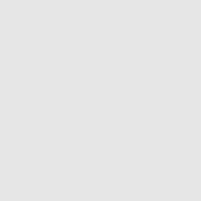
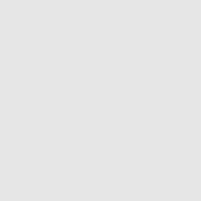
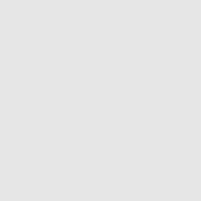
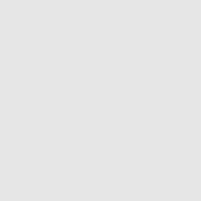
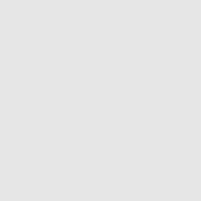
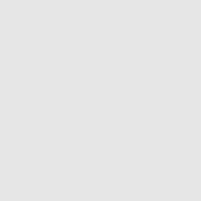
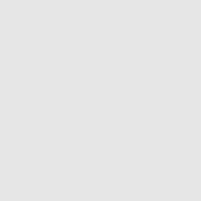
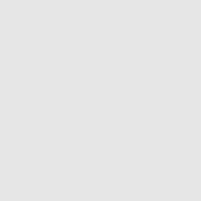
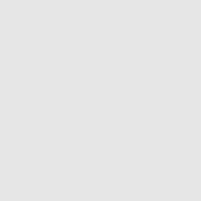
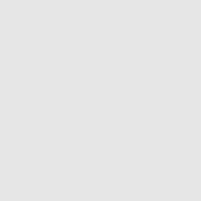
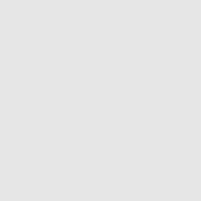
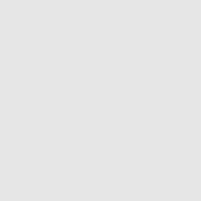
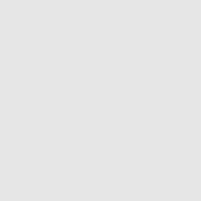
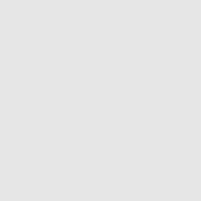
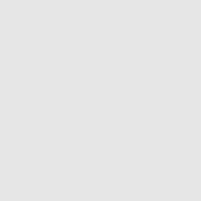
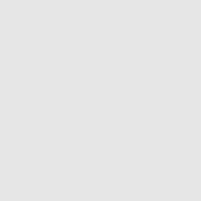
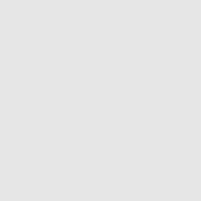
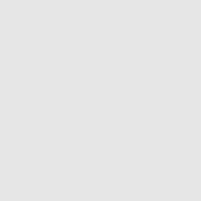
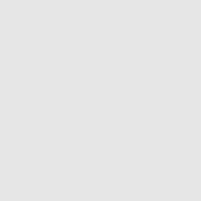
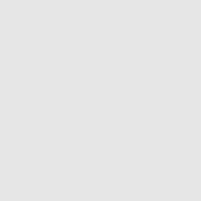
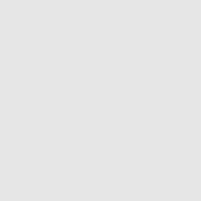
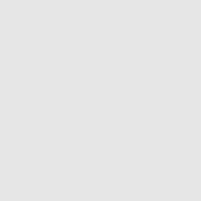

In [5]:
r.content

In [6]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(r.content, "html.parser")

In [7]:
main_table = soup.find(id="post-list-container-id")

In [8]:
titles = main_table.find_all("h2")

In [9]:
titles

[<h2 class="kt-post-card__title">شورولت تاهو LT مدل 2014</h2>,
 <h2 class="kt-post-card__title">سمند LX ساده، مدل ۱۳۹۷</h2>,
 <h2 class="kt-post-card__title">ام وی ام ۱۱۰</h2>,
 <h2 class="kt-post-card__title">پراید 111مدب سال 1390</h2>,
 <h2 class="kt-post-card__title">دنا اتومات اپشنال ۱۴۰۴</h2>,
 <h2 class="kt-post-card__title">دناپلاس بورسی ۱۴۰۴ سفید خشک صفر آماده تحویل</h2>,
 <h2 class="kt-post-card__title">پژو 405 GLX - دوگانه سوز CNG، مدل ۱۳۹۱</h2>,
 <h2 class="kt-post-card__title">آریزو5اف ال مدل1402</h2>,
 <h2 class="kt-post-card__title">سواری مزدا 323 F، مدل ۱۳۷۸ کولر روشن،برگه کارشناسی</h2>,
 <h2 class="kt-post-card__title">فروش خودرو پراید تصادفی</h2>,
 <h2 class="kt-post-card__title">پژو</h2>,
 <h2 class="kt-post-card__title">فونیکس آریزو 6 پرو، مدل ۱۴۰۲</h2>,
 <h2 class="kt-post-card__title">پژو پارس سال (xu7) مدل ۹۳</h2>,
 <h2 class="kt-post-card__title">پژو ۲۰۶ sd</h2>,
 <h2 class="kt-post-card__title">کوییک R تیپ S با استاندارد 85 گانه</h2>,
 <h2 class="kt-post-card__t

کد اصلی پردازش شود.


 Scraping page 1
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''

 Scraping page 2
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were found for ''
 Image download failed: No connection adapters were fo
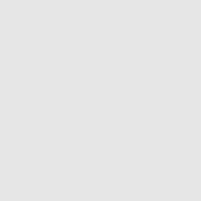
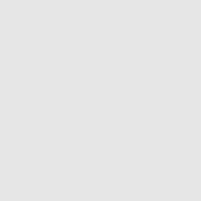
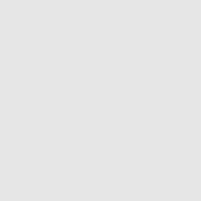
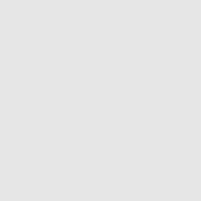
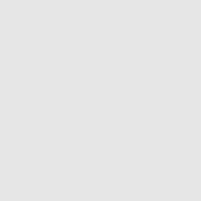
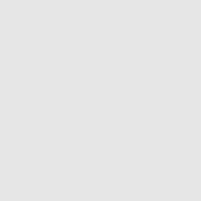
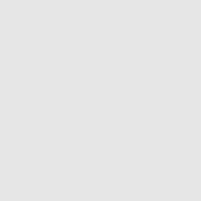
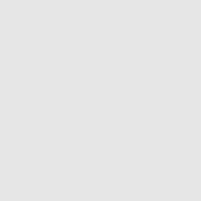
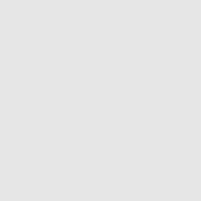
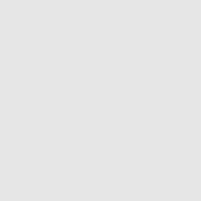
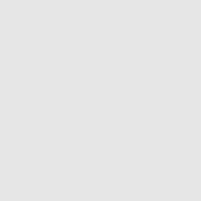
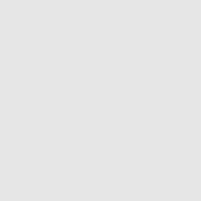
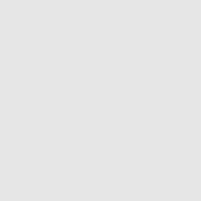
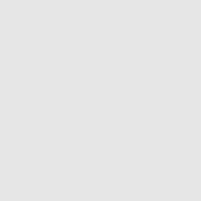
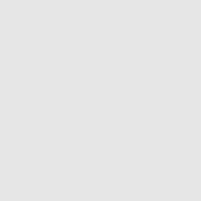
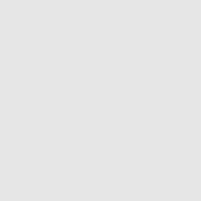
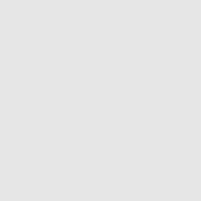
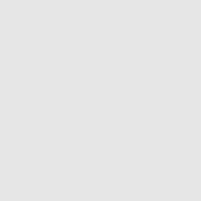
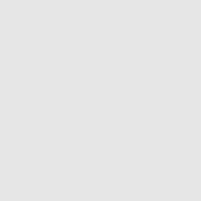
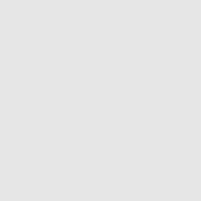
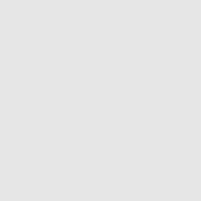
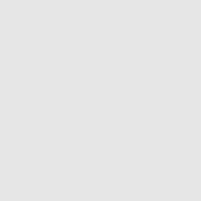
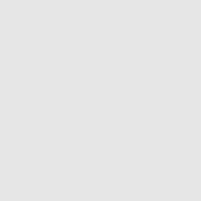
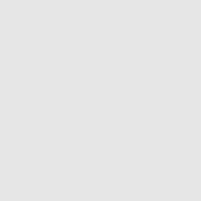
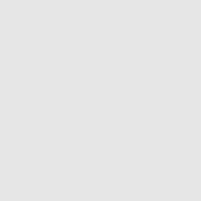
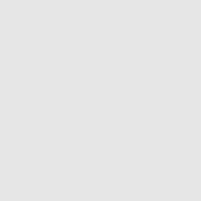
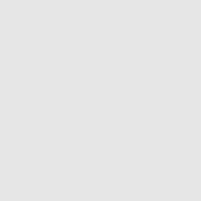
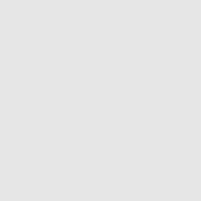
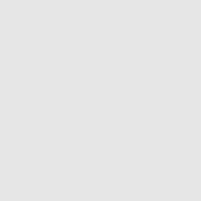
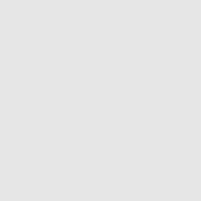
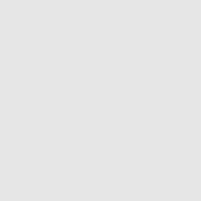

In [11]:
import os
import time
import requests
import sqlite3
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from PIL import Image
from io import BytesIO

# --- CONFIGURATION ---
BASE_URL = "https://divar.ir/s/iran/vehicles"
HEADERS = {"User-Agent": "Mozilla/5.0"}
IMAGE_DIR = "car_images"
DB_NAME = "car_data.db"
MAX_IMAGES_PER_CLASS = 200

# Persian model names mapped to English-safe folder names
CAR_MODELS = {
    "206": "206",
    "207": "207",
    "405": "405",
    "504": "504",
    "پراید": "Peride",
    "سمند": "Samand_LX",
    "سمند سورن": "Samand_Soren",
    "تارا": "Tara",
    "دنا": "Dena",
    "رانا": "Rana",
    "206 SD": "206_SD",
    "L90": "L90",
}

# Create image root folder
os.makedirs(IMAGE_DIR, exist_ok=True)
for folder in CAR_MODELS.values():
    os.makedirs(os.path.join(IMAGE_DIR, folder), exist_ok=True)

# Setup SQLite DB
conn = sqlite3.connect(DB_NAME)
c = conn.cursor()
c.execute(
    """
CREATE TABLE IF NOT EXISTS cars (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    model TEXT,
    title TEXT,
    price TEXT,
    mileage TEXT,
    location TEXT,
    image_path TEXT
)
"""
)
conn.commit()

# Initialize counter per model
model_counts = {model: 0 for model in CAR_MODELS.values()}
page_index = 0


def download_image(url, folder, index):
    try:
        response = requests.get(url, headers=HEADERS, timeout=10)
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content))

            # Clean extension
            img_extension = os.path.splitext(url.split("?")[0])[1]
            if img_extension.lower() not in [".jpg", ".jpeg", ".png", ".webp"]:
                img_extension = ".jpg"  # fallback

            filename = f"{index}{img_extension}"
            full_path = os.path.join(IMAGE_DIR, folder, filename)

            # Convert webp to jpg if needed
            if image.format == "WEBP":
                image = image.convert("RGB")
                full_path = os.path.splitext(full_path)[0] + ".jpg"

            image.save(full_path)
            return full_path
    except Exception as e:
        print(f" Image download failed: {e}")
    return None


def extract_card_info(card):
    title_tag = card.select_one("h2.kt-post-card__title")
    title = title_tag.text.strip() if title_tag else ""

    desc_tags = card.select("div.kt-post-card__description")
    mileage = ""
    price = ""
    for desc in desc_tags:
        text = desc.get_text()
        if "کیلومتر" in text:
            mileage = text
        elif "تومان" in text:
            price = text

    loc_tag = card.select_one("span.kt-post-card__bottom-description")
    location = loc_tag.get_text().strip() if loc_tag else ""

    img_tag = card.find_parent().select_one("img")
    img_url = img_tag["src"] if img_tag and img_tag.has_attr("src") else None

    return title, price, mileage, location, img_url


def detect_model(title):
    for fa, en in CAR_MODELS.items():
        if fa in title:
            return en
    return None


# --- SCRAPING LOOP ---
while True:
    print(f"\n Scraping page {page_index + 1}")
    res = requests.get(BASE_URL, headers=HEADERS, params={"page": page_index + 1})
    soup = BeautifulSoup(res.text, "html.parser")
    cards = soup.select("div.kt-post-card__body")

    if not cards:
        print(" No more listings found.")
        break

    for card in cards:
        title, price, mileage, location, img_url = extract_card_info(card)
        model_name = detect_model(title)

        if not model_name:
            continue  # Skip unknown models

        if model_counts[model_name] >= MAX_IMAGES_PER_CLASS:
            continue  # Skip if enough already

        image_path = None
        if img_url:
            image_path = download_image(
                img_url, model_name, model_counts[model_name] + 1
            )

        if image_path:
            c.execute(
                """
                INSERT INTO cars (model, title, price, mileage, location, image_path)
                VALUES (?, ?, ?, ?, ?, ?)""",
                (model_name, title, price, mileage, location, image_path),
            )
            conn.commit()
            model_counts[model_name] += 1
            print(
                f" [{model_name}] {title} ({model_counts[model_name]}/{MAX_IMAGES_PER_CLASS})"
            )

        if all(count >= MAX_IMAGES_PER_CLASS for count in model_counts.values()):
            break

    if all(count >= MAX_IMAGES_PER_CLASS for count in model_counts.values()):
        print("\n Done! All classes filled.")
        break

    page_index += 1
    time.sleep(2)

conn.close()

FINAL CODE

کد نهایی 

در حال اسکرپ صفحه 1
 ذخیره شد: فیدلیتی Elite 5 seater، مدل ۱۴۰۴ -> Unknown/1.webp
 ذخیره شد: رنو پی کی، مدل ۱۳۸۴ -> Unknown/2.webp
 ذخیره شد: دنا پلاس 5 دنده توربو، مدل ۱۳۹۹ -> Dena/1.webp
 ذخیره شد: sdv8اس دی وی هشتمدل96 -> Unknown/3.webp
 ذخیره شد: پژو 207i اتوماتیک TU5P، مدل ۱۴۰۴ -> 207/1.webp
 ذخیره شد: ۲۰۷ دنده سقف پانا ارتقا -> Unknown/4.webp
 ذخیره شد: ال نود مدل مدل92اتاق تعویض -> Unknown/5.webp
 ذخیره شد: کوییک ساده کمکار1400 -> Unknown/6.webp
 ذخیره شد: پژو 206 مدل 95تیپ۵ -> 206/1.webp
 ذخیره شد: پژو 405 جی ال ایکس (GLX)، مدل ۱۳۸۶ -> 405/1.webp
 ذخیره شد: سورن پلاس EF7 مدل 1403 -> Unknown/7.webp
 ذخیره شد: فولکس k70مدل۱۹۷۲،عتیقه -> Unknown/8.webp
 ذخیره شد: 111مدل 94 se -> Unknown/9.webp
 ذخیره شد: پیکان سواری، مدل ۱۳۸۱ -> Unknown/10.webp
 ذخیره شد: چانگان CS 55 پلاس، مدل 1404 تحویل روز -> Unknown/11.webp
 ذخیره شد: کوییک r مشکی قرمز -> Unknown/12.webp
 ذخیره شد: کوییک RS، مدل ۱۴۰۲ -> Unknown/13.webp
 ذخیره شد: اچ سی کراس مدل ۹۵ دنده ای -> Unknown/14.webp
 ذخیره شد: پژو 405 G
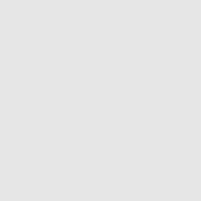
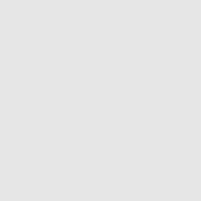
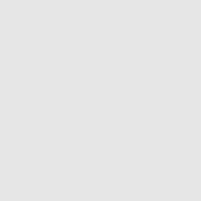
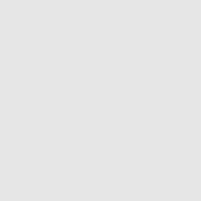
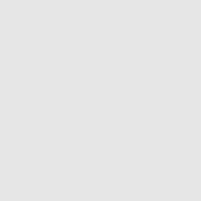
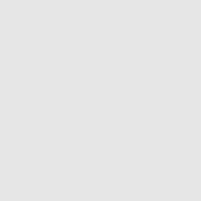
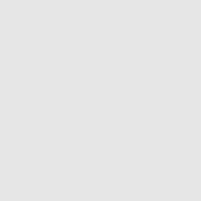
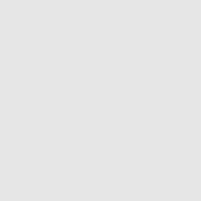
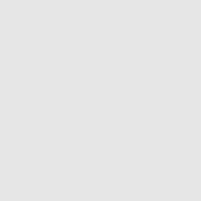
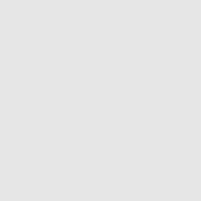
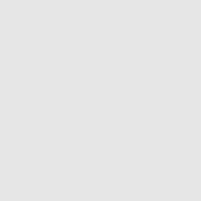
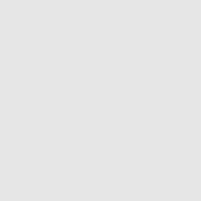
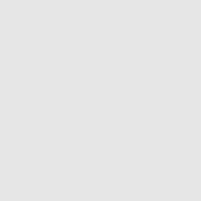
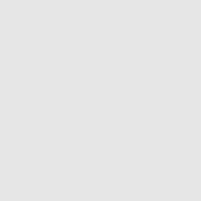
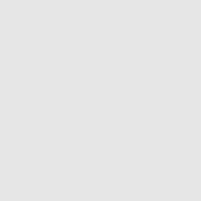
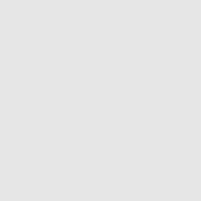
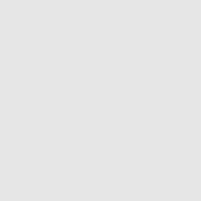
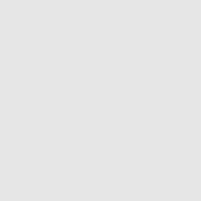
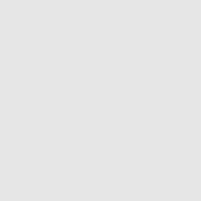
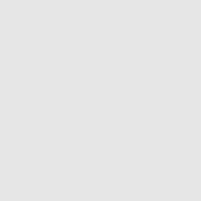
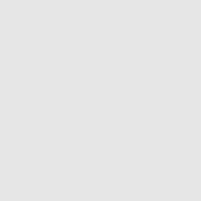
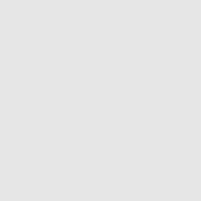
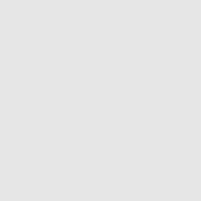
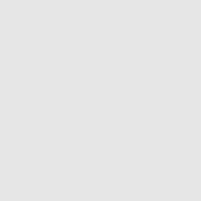
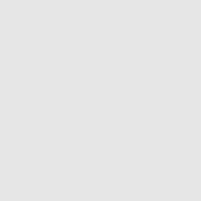
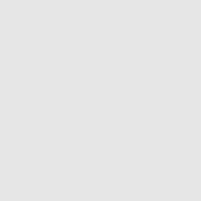
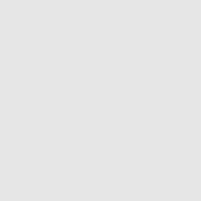
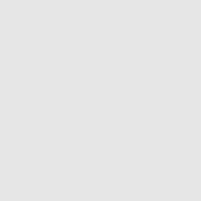
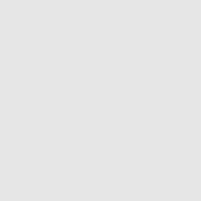
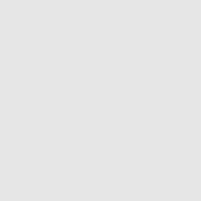
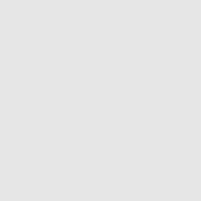
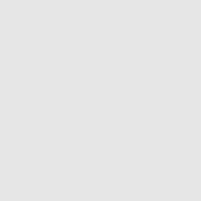
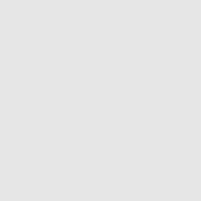
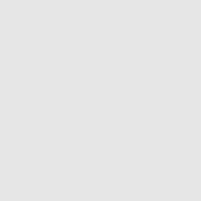
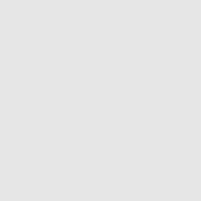
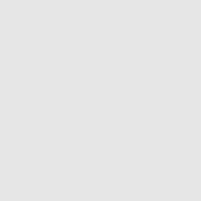
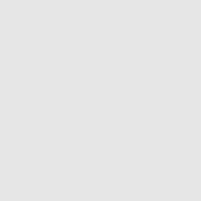
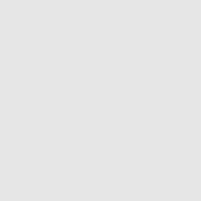
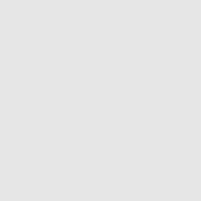
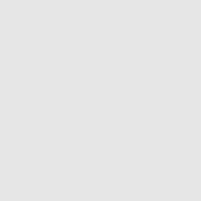
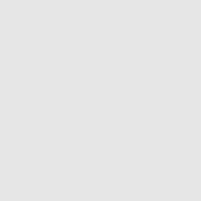
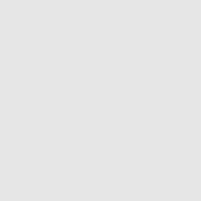
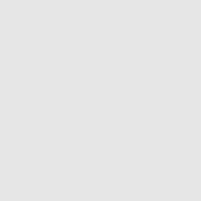
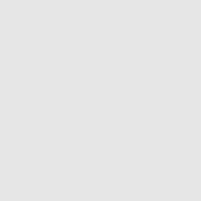
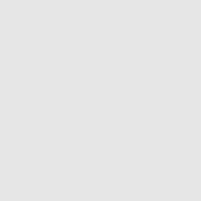
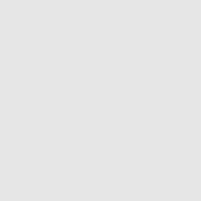
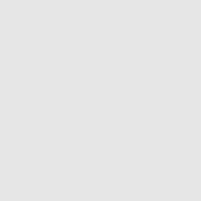
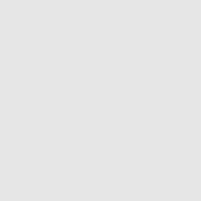
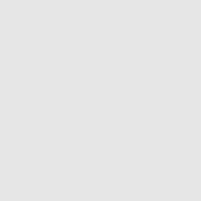
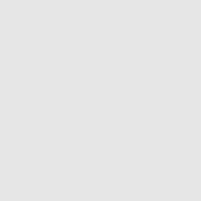
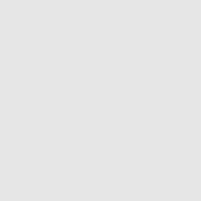
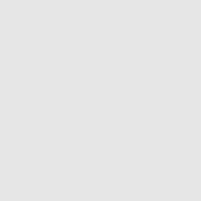
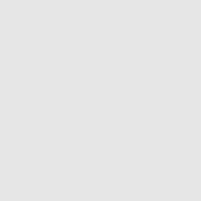
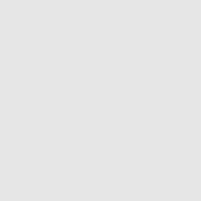
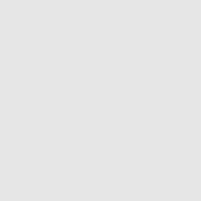
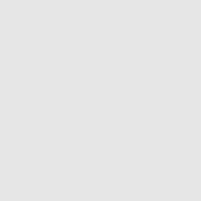
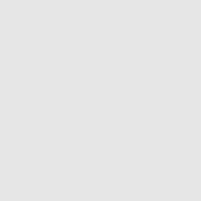
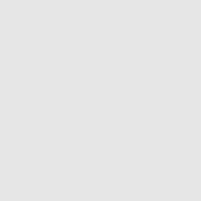
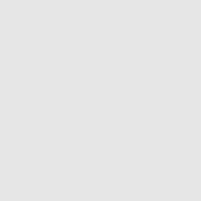
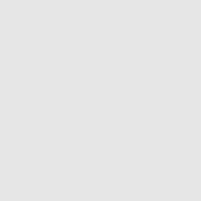
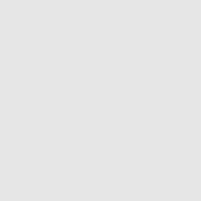
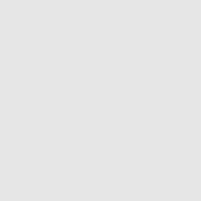
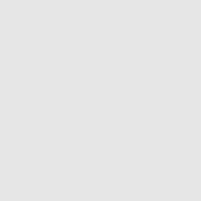
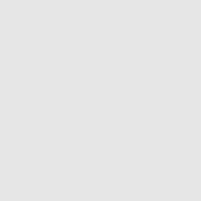
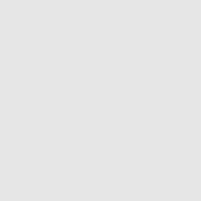
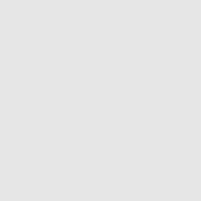
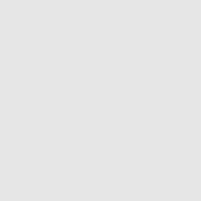
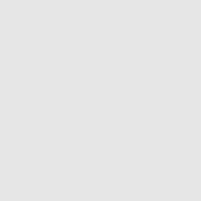
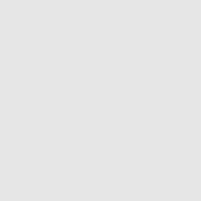
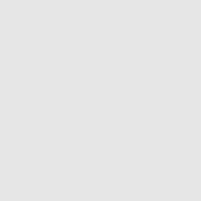
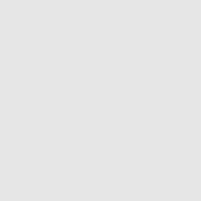
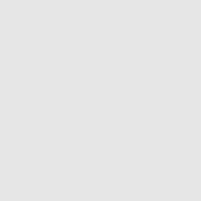
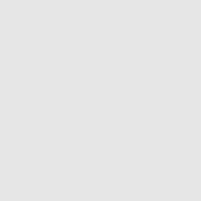
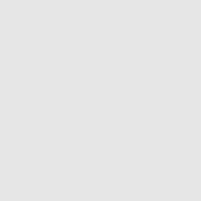
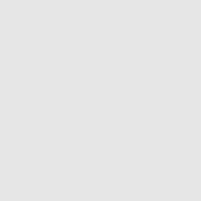
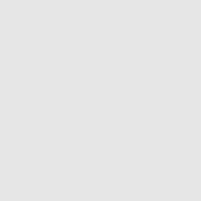
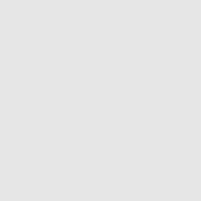
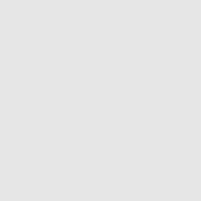
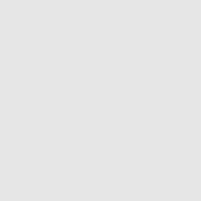
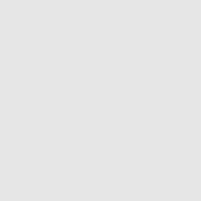
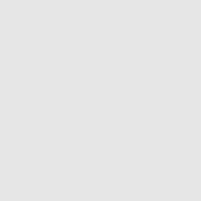
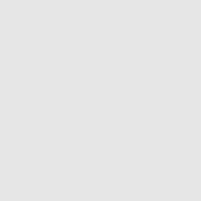
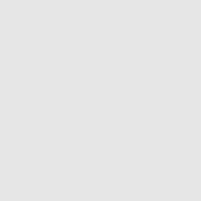
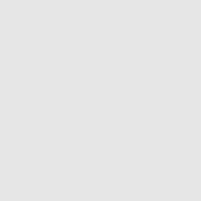
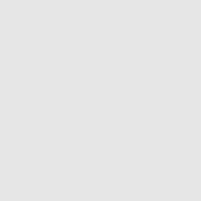
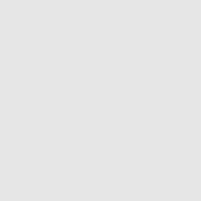
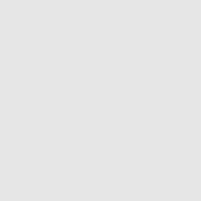
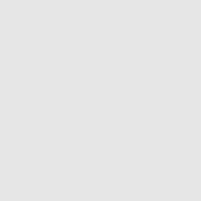
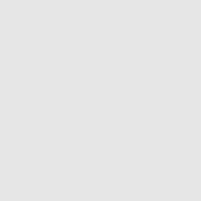
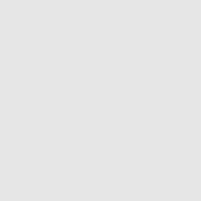
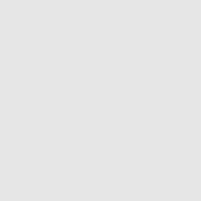
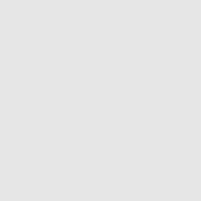
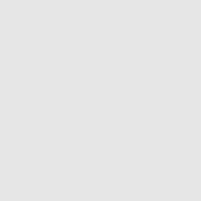
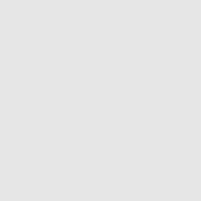
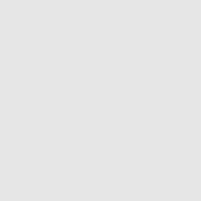
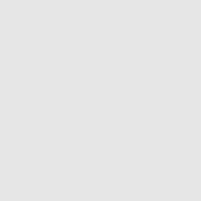
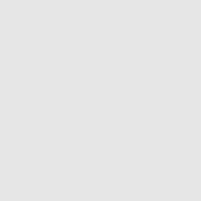
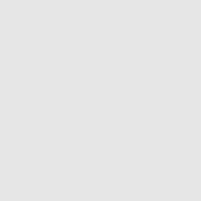
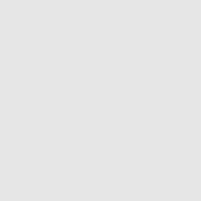
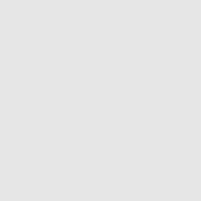
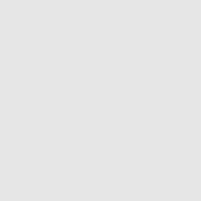
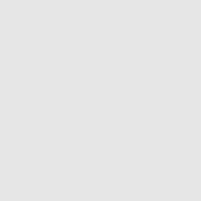
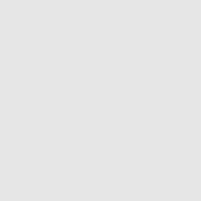
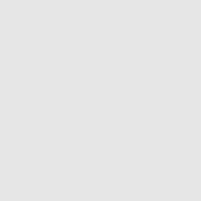
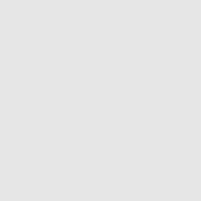
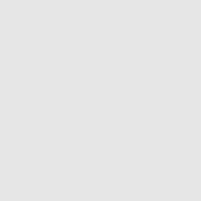
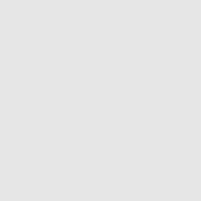
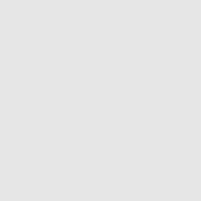
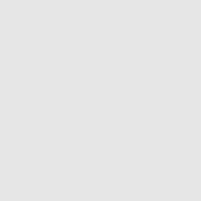
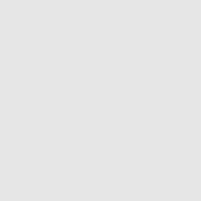
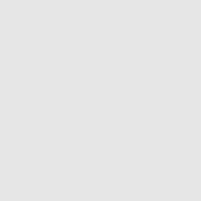
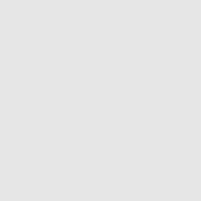
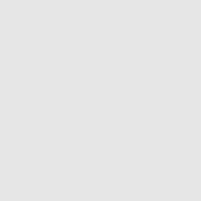
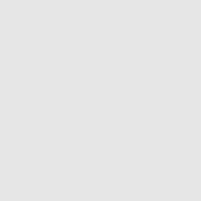
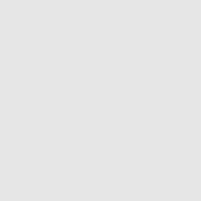
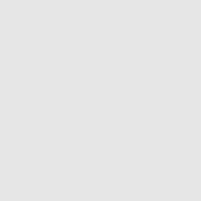
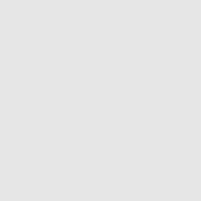
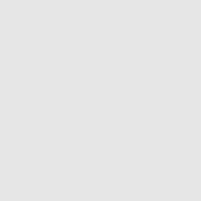
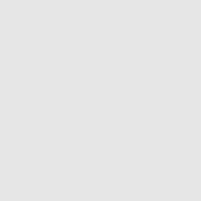
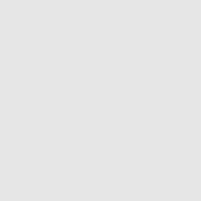
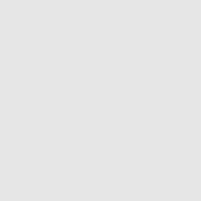
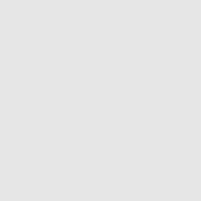
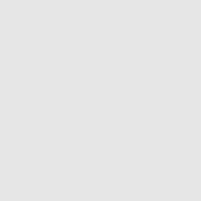
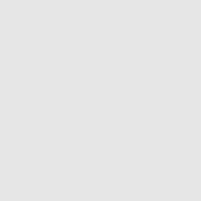
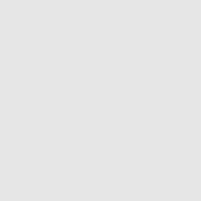
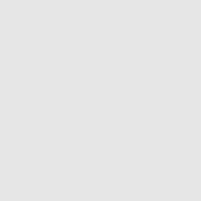
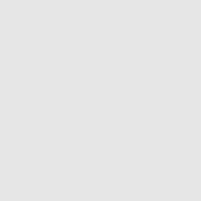
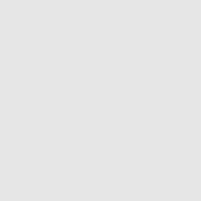
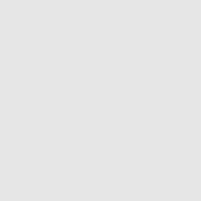
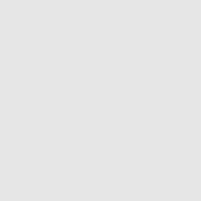
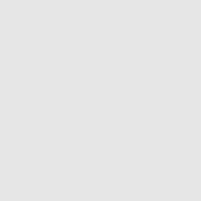
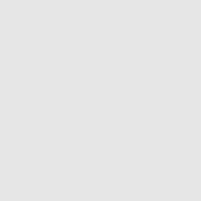
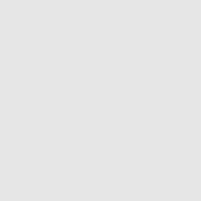
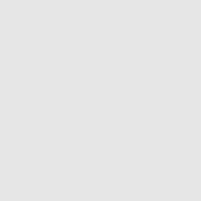
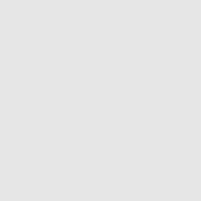
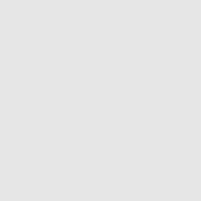
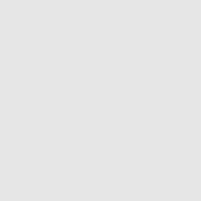
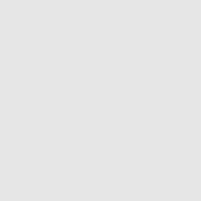
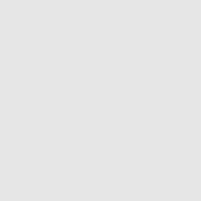
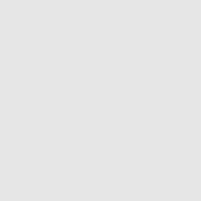
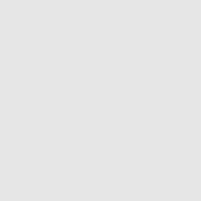
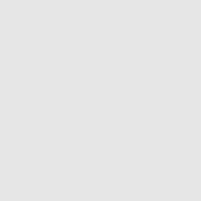
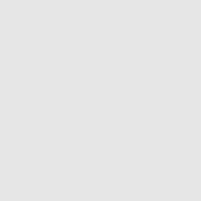
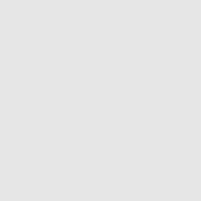
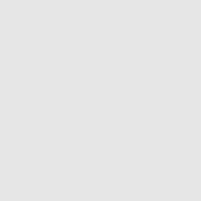
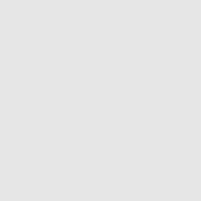
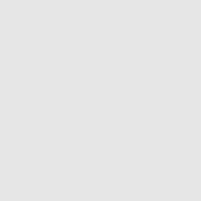
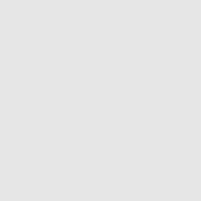
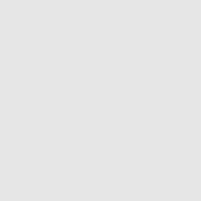
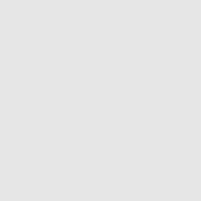
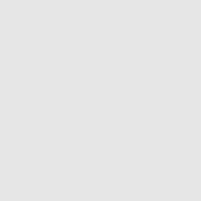
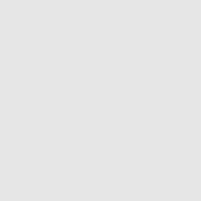
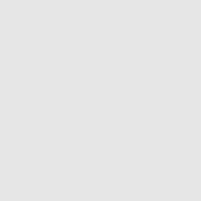
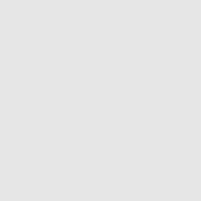
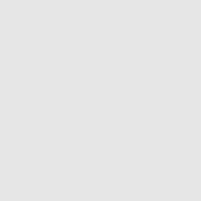
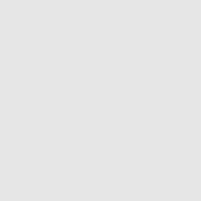
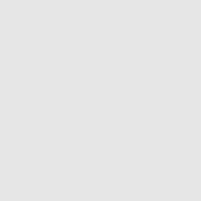
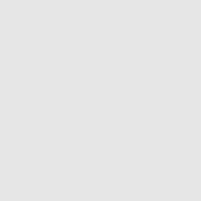
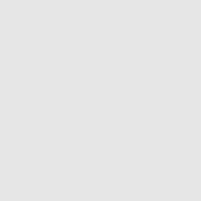
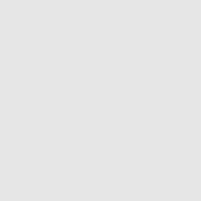
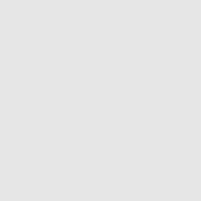
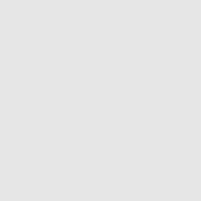
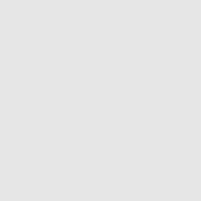
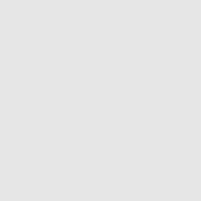
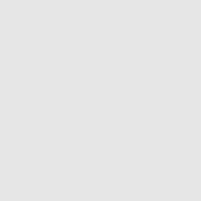
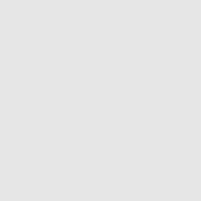
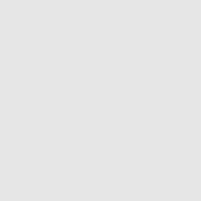
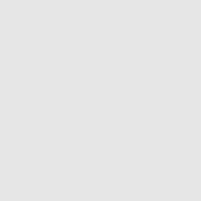
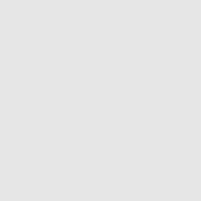
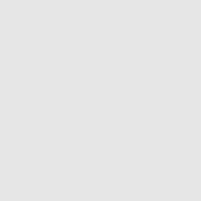
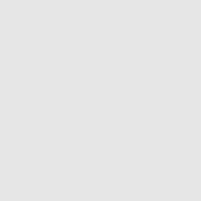
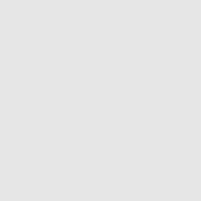
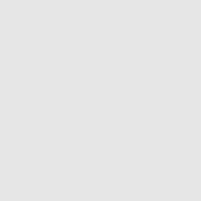
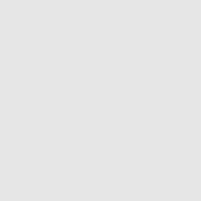
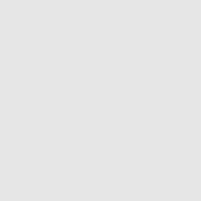
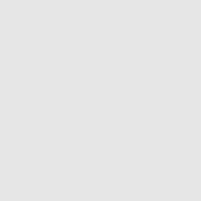
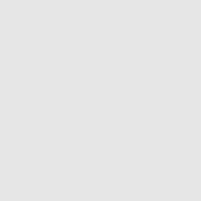
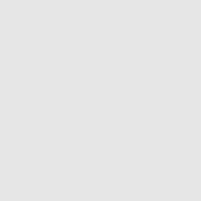
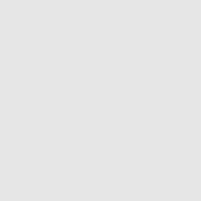
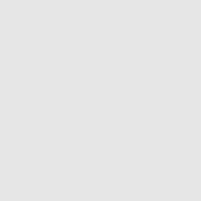
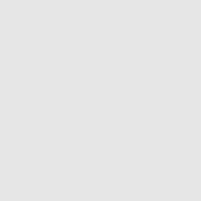
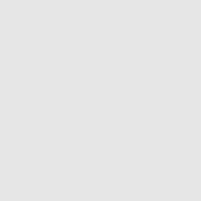
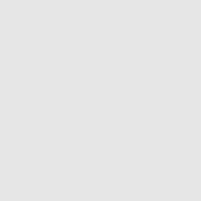
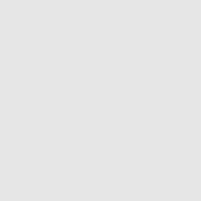
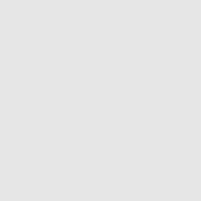
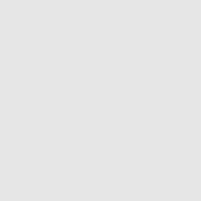
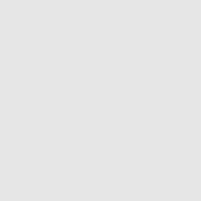
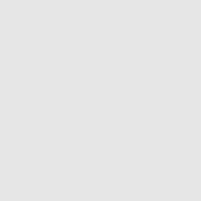
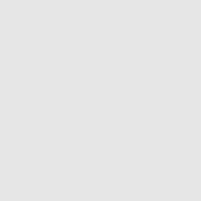
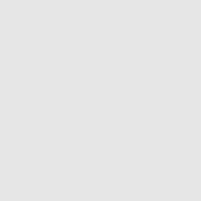
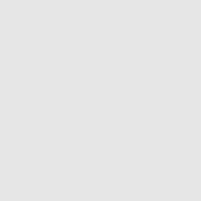
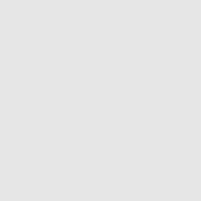
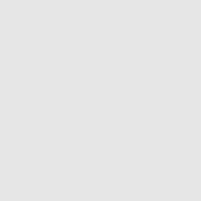
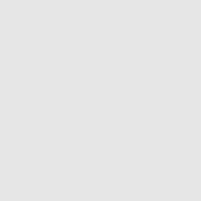
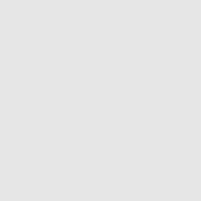
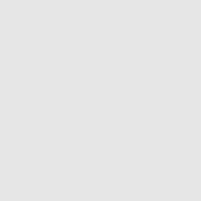
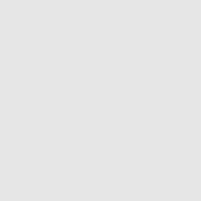
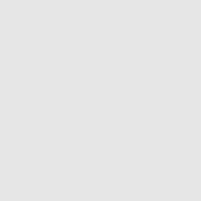
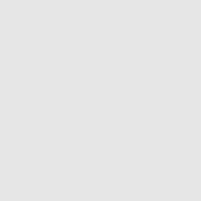
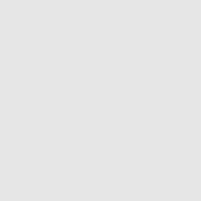
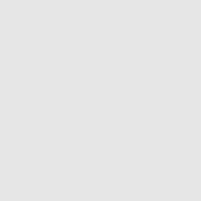
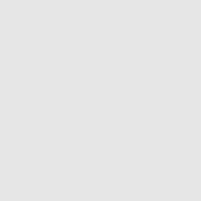
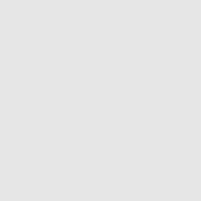
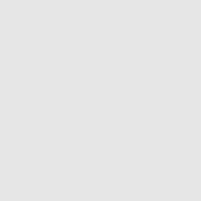
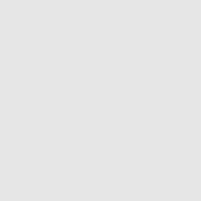
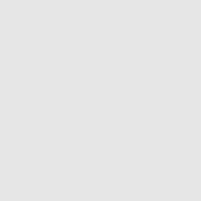
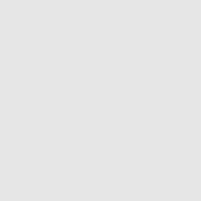
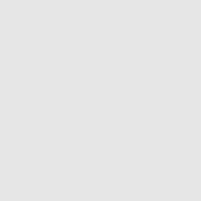
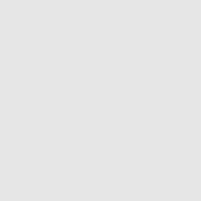
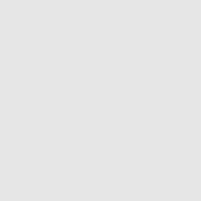
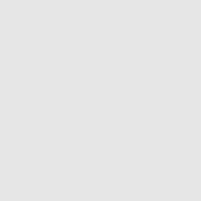
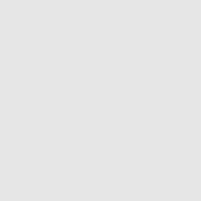
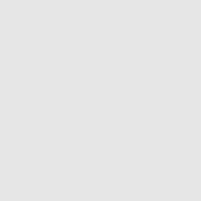
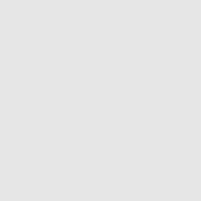
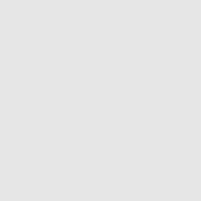
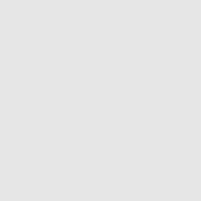
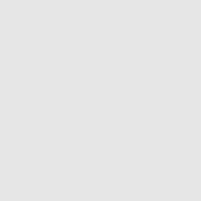
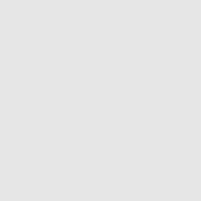
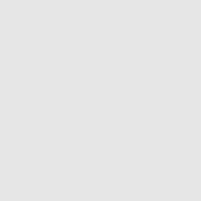
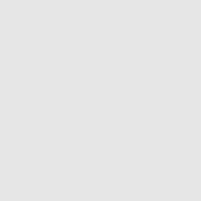
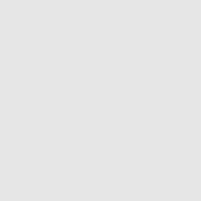
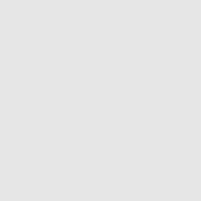
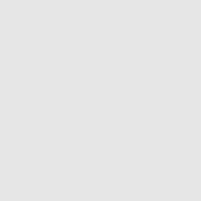
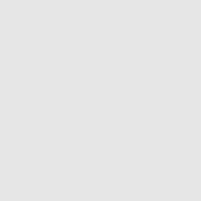
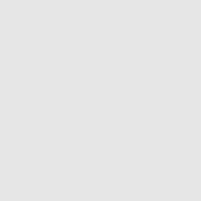
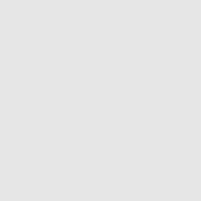
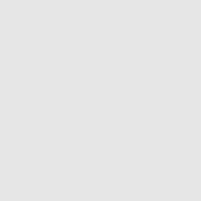
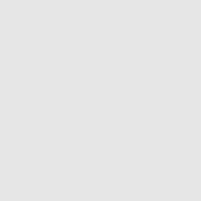
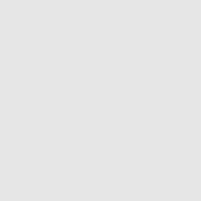
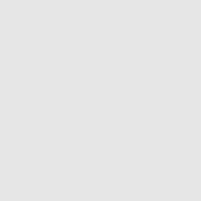
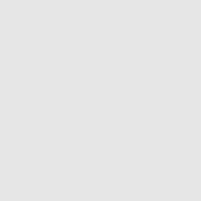
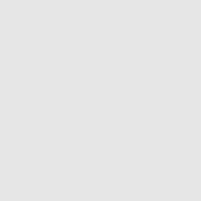
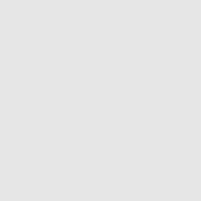
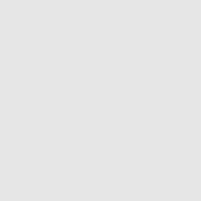
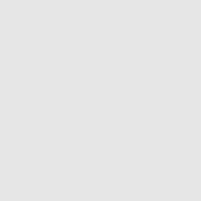
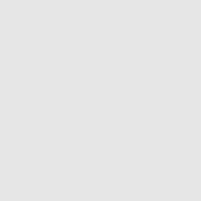
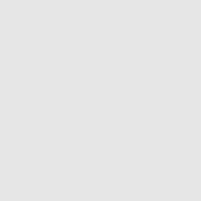
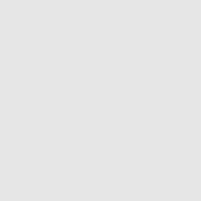
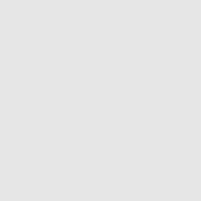
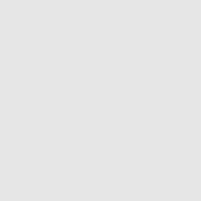
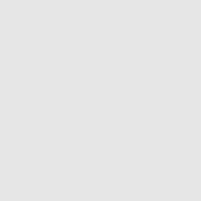
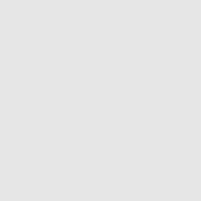
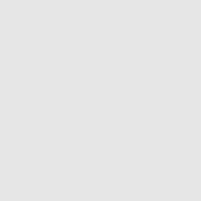
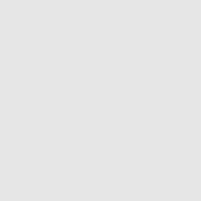
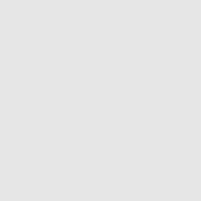
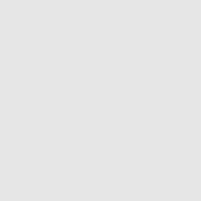
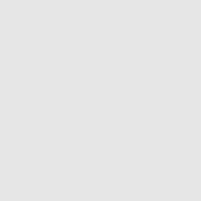
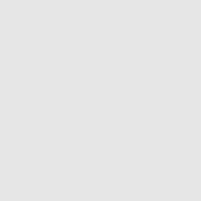
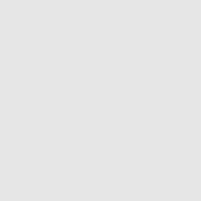
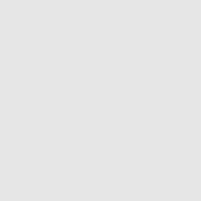
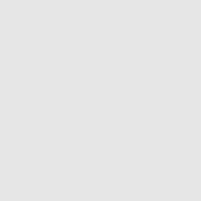
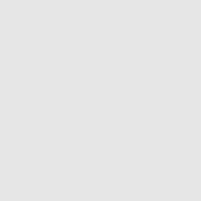
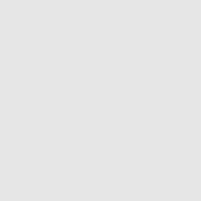
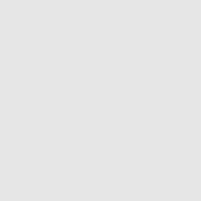
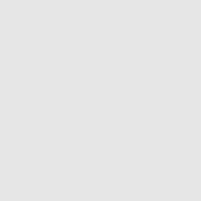
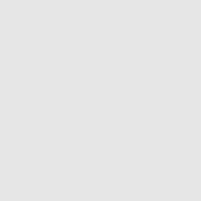
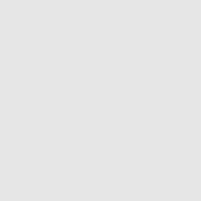
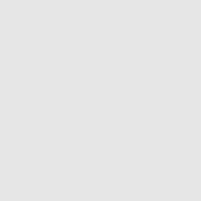

In [11]:
import time
import os
import sqlite3
import requests
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

# ------------------ تنظیمات ------------------
BASE_URL = "https://divar.ir/s/iran/car"
IMAGE_DIR = "car_images"
DB_NAME = "car_data.db"
MAX_IMAGES_PER_MODEL = 200

CAR_MODELS = {
    "206": "206",
    "207": "207",
    "405": "405",
    "504": "504",
    "پراید": "Peride",
    "سمند سورن": "Samand_Soren",
    "سمند": "Samand_LX",
    "تارا": "Tara",
    "دنا": "Dena",
    "رانا": "Rana",
    "206 SD": "206_SD",
    "L90": "L90",
}

# ------------------ آماده‌سازی دیتابیس ------------------
conn = sqlite3.connect(DB_NAME)
c = conn.cursor()
c.execute(
    """
CREATE TABLE IF NOT EXISTS cars (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT,
    model TEXT,
    price TEXT,
    year TEXT,
    mileage TEXT,
    location TEXT,
    image_path TEXT
)
"""
)
conn.commit()

# ------------------ تنظیم مرورگر ------------------
options = Options()
options.add_argument("--headless")
driver = webdriver.Chrome(options=options)
driver.set_window_size(1920, 1080)

images_per_model = {model: 0 for model in CAR_MODELS.values()}
images_per_model["Unknown"] = 0  # برای مواردی که مدل پیدا نشه


def extract_metadata(card):
    title = card.find("h2").text.strip() if card.find("h2") else None
    model_found = "Unknown"
    if title:
        for key, model in CAR_MODELS.items():
            if key in title:
                model_found = model
                break

    meta_divs = card.find_all("div", class_="kt-post-card__description")
    price, year, mileage = None, None, None

    for meta in meta_divs:
        txt = meta.get_text()
        if "تومان" in txt:
            price = txt
        elif "کیلومتر" in txt:
            mileage = txt
        elif "مدل" in txt:
            year = txt

    location_div = card.find("span", class_="kt-post-card__bottom-description")
    location = location_div.text.strip() if location_div else None
    return title, model_found, price, year, mileage, location


page_index = 1
while True:
    print(f"در حال اسکرپ صفحه {page_index}")
    driver.get(f"{BASE_URL}?page={page_index}")
    time.sleep(3)

    soup = BeautifulSoup(driver.page_source, "html.parser")
    posts = soup.find_all("div", class_="kt-post-card__body")

    if not posts:
        print(" صفحه جدیدی یافت نشد. پایان.")
        break

    for post in posts:
        title, model_found, price, year, mileage, location = extract_metadata(post)

        if images_per_model[model_found] >= MAX_IMAGES_PER_MODEL:
            continue

        img_tag = post.find_parent().find("img")
        if img_tag and img_tag.has_attr("src"):
            img_url = img_tag["src"]

            try:
                # ساخت پوشه مخصوص مدل
                model_dir = os.path.join(IMAGE_DIR, model_found)
                os.makedirs(model_dir, exist_ok=True)

                img_data = requests.get(img_url, timeout=10).content
                img_ext = os.path.splitext(img_url.split("?")[0])[1] or ".jpg"
                img_name = f"{images_per_model[model_found] + 1}{img_ext}"
                img_path = os.path.join(model_dir, img_name)

                with open(img_path, "wb") as f:
                    f.write(img_data)

                c.execute(
                    """
                    INSERT INTO cars (title, model, price, year, mileage, location, image_path)
                    VALUES (?, ?, ?, ?, ?, ?, ?)
                """,
                    (title, model_found, price, year, mileage, location, img_path),
                )
                conn.commit()

                images_per_model[model_found] += 1

                print(f" ذخیره شد: {title} -> {model_found}/{img_name}")

            except Exception as e:
                print(f" خطا در دانلود تصویر: {e}")

    if all(count >= MAX_IMAGES_PER_MODEL for count in images_per_model.values()):
        print(" همه مدل‌ها به سقف عکس رسیدند.")
        break

    page_index += 1

driver.quit()
conn.close()
print("\n عملیات پایان یافت.")